### **Object detection in VisDrone dataset using YOLO**

This notebook is designed for training the YOLO model on Google Colab using GPUs. The notebook code assumes a Colab environment, and paths and folders are referenced accordingly.

Before running the notebook, make sure to upload the zip files (here I used:'VisDrone2019-DET-test-dev.zip' and 'VisDrone2019-DET-val.zip') into the 'VisDrone' folder at the root of the Colab environment.

In this configuration, the VisDrone2019-DET-test-dev will be used for training due to its intermediate size, falling between the validation and the larger 'VisDrone2019-DET-train'. This choice is made to speed up the training process.

The notebook will handle the unzipping of files, proceed with model training, and finally, compress the 'runs' folder containing the trained model. Then, the compressed model can be downloaded for further use.

#### Load libraries and modules

In [1]:
import os
import cv2

from ultralytics import YOLO

from src.data_preparation import prepare_data
from src.predict import yolo_predict_img
from src._utils import zip_folder

from IPython.display import display, Image

#### Data preparation

Data preparation involves the following key steps:

    Extract Zip Files:
        Create destination directories.
        Iterate through zip files.
        Extract valid zip files, printing extraction status.

    Rename Datasets:
        Rename folders using old-new name pairs, indicating folders' old and new names.

    Convert VisDrone Annotations to YOLO Labels:
        Create 'labels' directory.
        Iterate through VisDrone annotations.
        Convert bounding boxes to YOLO format.
        Write YOLO label files for each image.

In [2]:
ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'VisDrone')
DATASET_DIR = os.path.join(DATA_ROOT_DIR, 'datasets')

In [6]:
old_new_names = [('VisDrone2019-DET-test-dev', 'train'), 
                 ('VisDrone2019-DET-val', 'val')]

prepare_data(DATA_ROOT_DIR, DATASET_DIR, old_new_names)

Successfully extracted: VisDrone2019-DET-test-dev.zip
Successfully extracted: VisDrone2019-DET-val.zip
Extraction completed.
Rename completed.


Converting VisDrone\datasets\train: 1610it [00:24, 64.49it/s] 
Converting VisDrone\datasets\val: 548it [00:11, 46.01it/s]


#### Model training

The "yolov8n" is a pretrained YOLO model characterized by a **nano** architecture. With a compact design, it contains 3.2 million parameters. 

In [39]:
model = YOLO("yolov8n.pt")
results = model.train(data=os.path.join(ROOT_DIR, "yolo_config.yaml"), epochs=30, imgsz=640)

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/VisDrone/yolo_config.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

train: Scanning /content/VisDrone/datasets/train/labels... 1610 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1610/1610 [00:01<00:00, 895.01it/s] 

train: New cache created: /content/VisDrone/datasets/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/VisDrone/datasets/val/labels... 548 images, 0 backgrounds, 0 corrupt: 100%|██████████| 548/548 [00:01<00:00, 534.58it/s]


val: New cache created: /content/VisDrone/datasets/val/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.93G      2.054      3.322      1.082        401        640: 100%|██████████| 101/101 [01:53<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


                   all        548      38759      0.625     0.0809     0.0647     0.0341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.59G      1.908      2.014      1.019        483        640: 100%|██████████| 101/101 [01:27<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]


                   all        548      38759      0.456      0.124     0.0984     0.0525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.23G      1.847      1.793      1.018        949        640: 100%|██████████| 101/101 [01:31<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]


                   all        548      38759      0.338      0.136      0.104     0.0522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.12G      1.816      1.696      1.004        749        640: 100%|██████████| 101/101 [01:28<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.18it/s]


                   all        548      38759      0.269      0.163       0.12     0.0654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.06G       1.78      1.615          1        920        640: 100%|██████████| 101/101 [01:29<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]


                   all        548      38759      0.379      0.158      0.126     0.0658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      6.29G       1.75      1.559     0.9942        673        640: 100%|██████████| 101/101 [01:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.15it/s]


                   all        548      38759      0.168       0.18      0.124     0.0663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      6.08G      1.738      1.516      0.984        609        640: 100%|██████████| 101/101 [01:30<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]


                   all        548      38759      0.217       0.18      0.143     0.0769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      6.95G      1.706      1.472       0.98        709        640: 100%|██████████| 101/101 [01:31<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.30it/s]


                   all        548      38759      0.223      0.194       0.15     0.0802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.53G      1.712      1.448     0.9771        759        640: 100%|██████████| 101/101 [01:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.22it/s]


                   all        548      38759      0.224      0.176      0.146      0.077

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.26G      1.685      1.415     0.9749        529        640: 100%|██████████| 101/101 [01:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.29it/s]


                   all        548      38759      0.248      0.188      0.154      0.084

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.29G      1.662      1.382     0.9713        729        640: 100%|██████████| 101/101 [01:30<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.25it/s]


                   all        548      38759      0.207      0.199      0.153     0.0809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.64G      1.674      1.381     0.9668        661        640: 100%|██████████| 101/101 [01:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.37it/s]


                   all        548      38759       0.24        0.2      0.158     0.0841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.58G      1.655       1.34     0.9636        635        640: 100%|██████████| 101/101 [01:28<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]


                   all        548      38759      0.245      0.214      0.172     0.0934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.77G       1.63      1.326     0.9607        750        640: 100%|██████████| 101/101 [01:33<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.30it/s]


                   all        548      38759      0.252      0.206      0.168     0.0894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.22G      1.632      1.309     0.9605        940        640: 100%|██████████| 101/101 [01:28<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.26it/s]


                   all        548      38759      0.243       0.21      0.167     0.0902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.63G      1.606      1.289     0.9563        496        640: 100%|██████████| 101/101 [01:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]


                   all        548      38759       0.26      0.215      0.177     0.0953

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.52G      1.629       1.29     0.9523        698        640: 100%|██████████| 101/101 [01:32<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.30it/s]


                   all        548      38759      0.261      0.216      0.182     0.0997

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.95G      1.619      1.276      0.951        682        640: 100%|██████████| 101/101 [01:32<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.31it/s]


                   all        548      38759      0.277      0.212      0.178     0.0978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      5.71G        1.6      1.262     0.9527        986        640: 100%|██████████| 101/101 [01:31<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.32it/s]


                   all        548      38759      0.276      0.211      0.177     0.0952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30       5.6G      1.616      1.258     0.9474        532        640: 100%|██████████| 101/101 [01:33<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]


                   all        548      38759      0.276      0.226      0.192      0.104
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      5.86G      1.564      1.269     0.9504        337        640: 100%|██████████| 101/101 [01:31<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.30it/s]


                   all        548      38759      0.278       0.22      0.188      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      5.61G       1.55      1.219     0.9453        393        640: 100%|██████████| 101/101 [01:17<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.06it/s]


                   all        548      38759      0.265       0.22      0.188      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.56G      1.536      1.198       0.94        590        640: 100%|██████████| 101/101 [01:16<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.37it/s]


                   all        548      38759      0.275       0.23      0.192      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.67G       1.51       1.16     0.9377        261        640: 100%|██████████| 101/101 [01:16<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.23it/s]


                   all        548      38759      0.276      0.227      0.195      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      5.16G      1.521      1.161      0.937        310        640: 100%|██████████| 101/101 [01:21<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.36it/s]


                   all        548      38759      0.272      0.236      0.193      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.34G      1.501      1.147     0.9337        585        640: 100%|██████████| 101/101 [01:15<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.28it/s]


                   all        548      38759      0.283       0.23      0.197      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      5.05G      1.497      1.141     0.9319        482        640: 100%|██████████| 101/101 [01:21<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:13<00:00,  1.31it/s]


                   all        548      38759      0.281      0.226      0.194      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      5.03G        1.5      1.131     0.9292        355        640: 100%|██████████| 101/101 [01:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:12<00:00,  1.40it/s]


                   all        548      38759      0.279      0.231      0.198      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.85G      1.494      1.116     0.9313        293        640: 100%|██████████| 101/101 [01:16<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:16<00:00,  1.10it/s]


                   all        548      38759      0.281      0.231        0.2      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.61G      1.477        1.1     0.9262        433        640: 100%|██████████| 101/101 [01:17<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.27it/s]


                   all        548      38759      0.288      0.237      0.202      0.112

30 epochs completed in 0.870 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 3/18 [00:14<01:19,  5.28s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 4/18 [00:34<02:37, 11.22s/it]

WARNING ⚠️ NMS time limit 2.100s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [01:08<00:00,  3.80s/it]


                   all        548      38759      0.287      0.234      0.199       0.11
            pedestrian        548       8844      0.357      0.248       0.24     0.0982
                people        548       5125      0.353      0.184      0.172      0.056
               bicycle        548       1287     0.0587    0.00311     0.0225    0.00748
                   car        548      14064      0.507      0.657      0.631      0.406
                   van        548       1975      0.285      0.244      0.201       0.13
                 truck        548        750      0.204      0.231      0.155      0.101
              tricycle        548       1045       0.29      0.148       0.13     0.0649
       awning-tricycle        548        532      0.108      0.156     0.0512     0.0294
                   bus        548        251      0.412      0.195      0.188      0.134
                 motor        548       4886      0.299      0.272      0.201     0.0719
Speed: 0.4ms preproce

#### Export model

Zip and export the the trained model and the training info in runs folder.

In [15]:
folder_path = os.path.join(ROOT_DIR, 'runs')
zip_file_name = os.path.join(ROOT_DIR, 'runs.zip')

zip_folder(ROOT_DIR, folder_path, zip_file_name)

The folder ./runs has been zipped.


In [ ]:
# from google.colab import files
# files.download(zip_file_name)

#### Model inspection

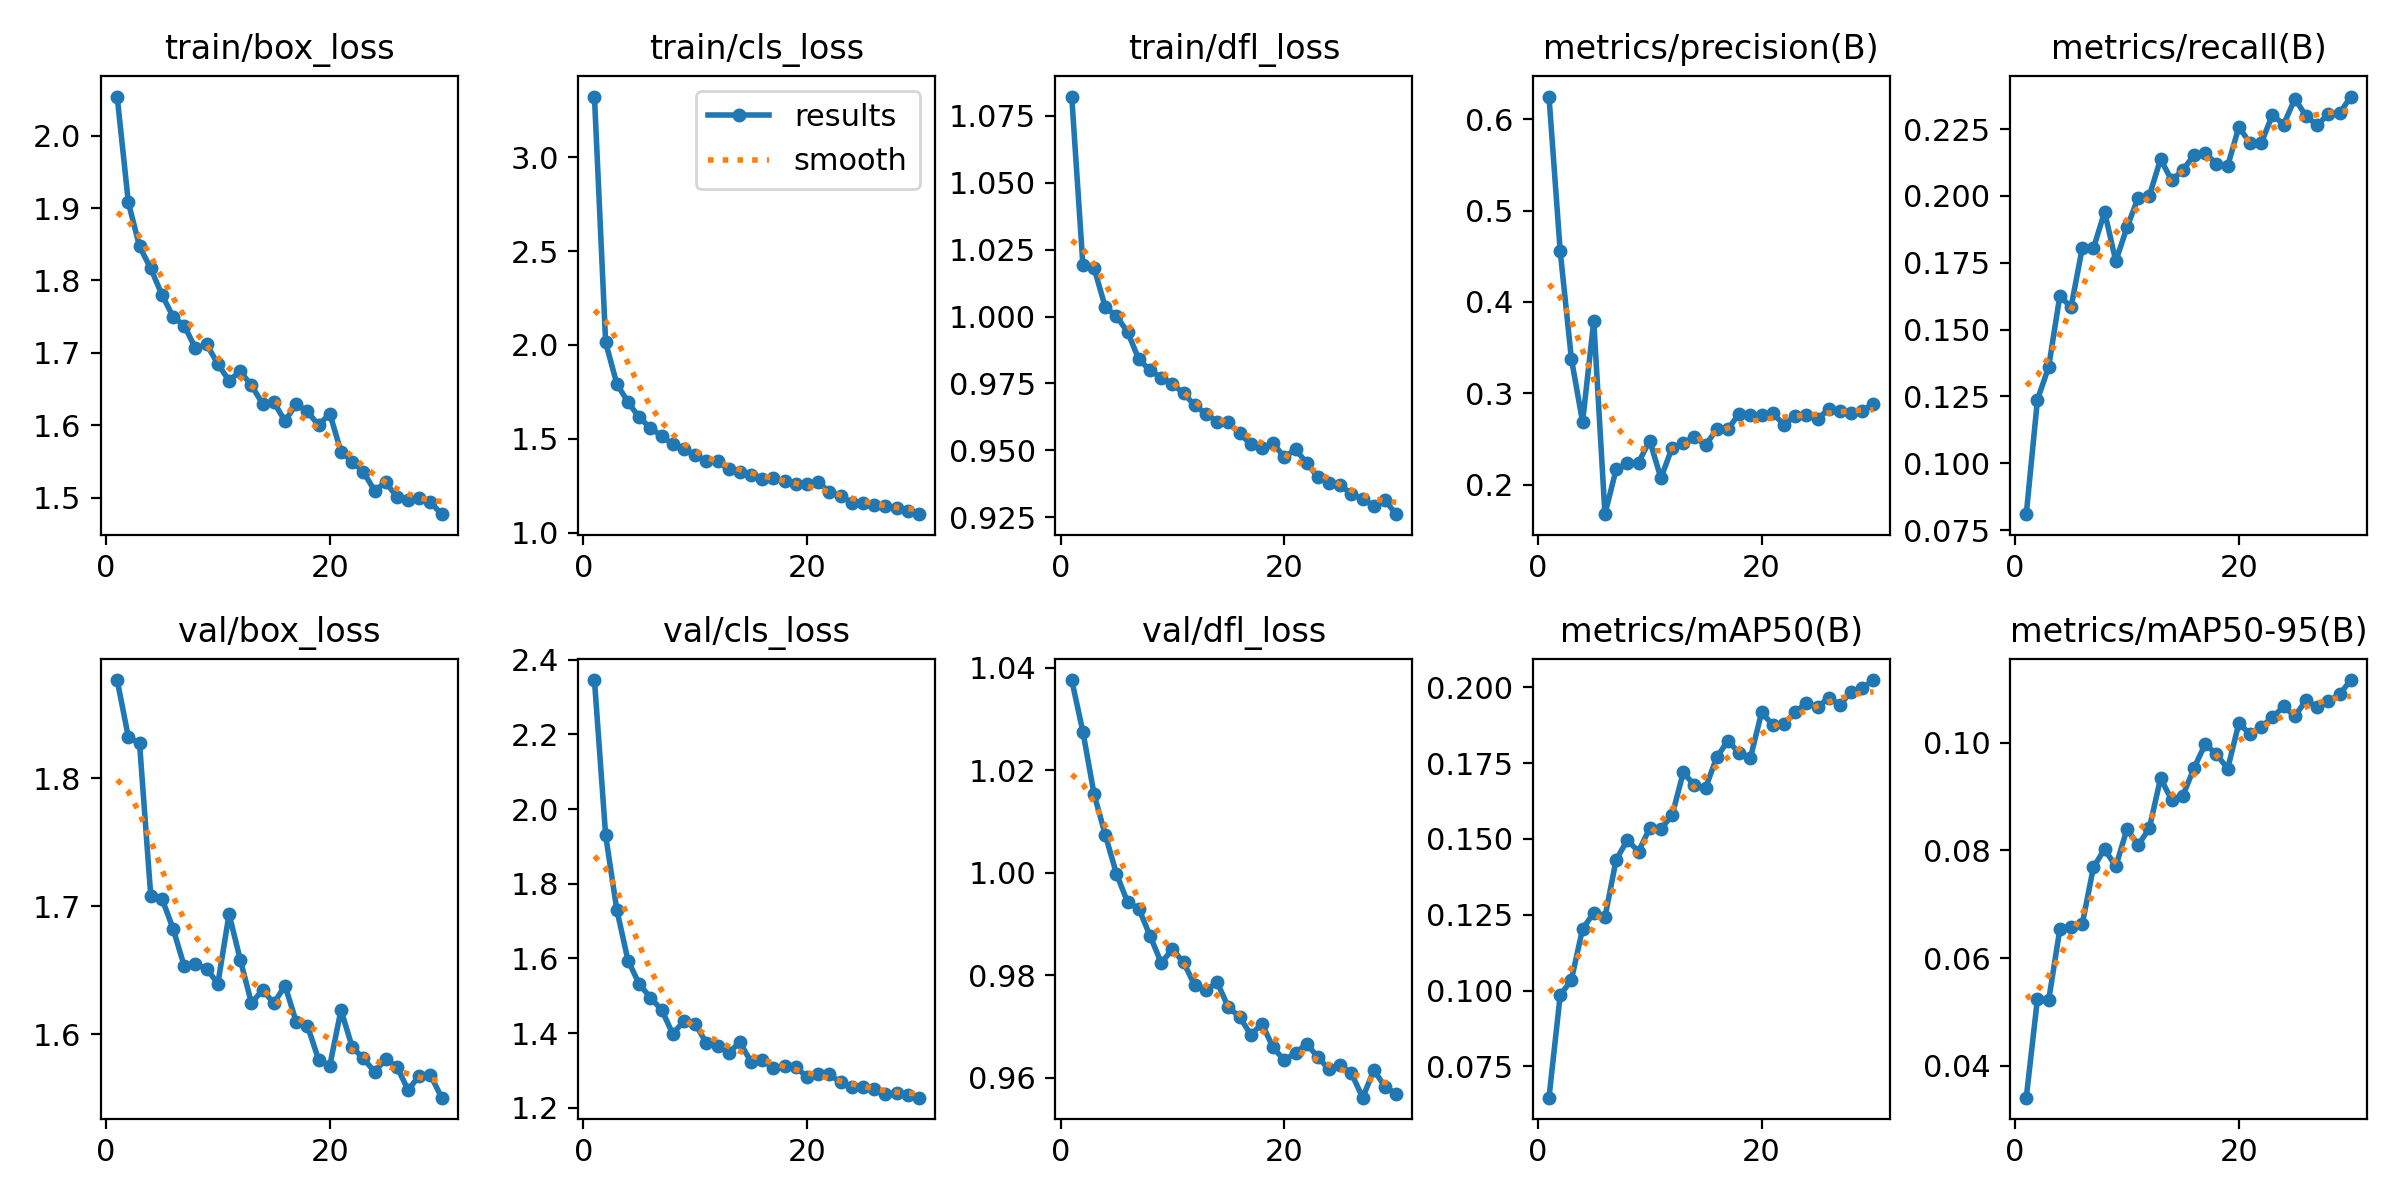

In [46]:
display(Image(filename=os.path.join(ROOT_DIR, 'runs', 'detect', 'train', 'results.png')))

The training and validation metrics exhibit a convergence pattern across epochs, and demonstrate a consistent match during training. These patterns indicate the model is not likely to be overfitting.

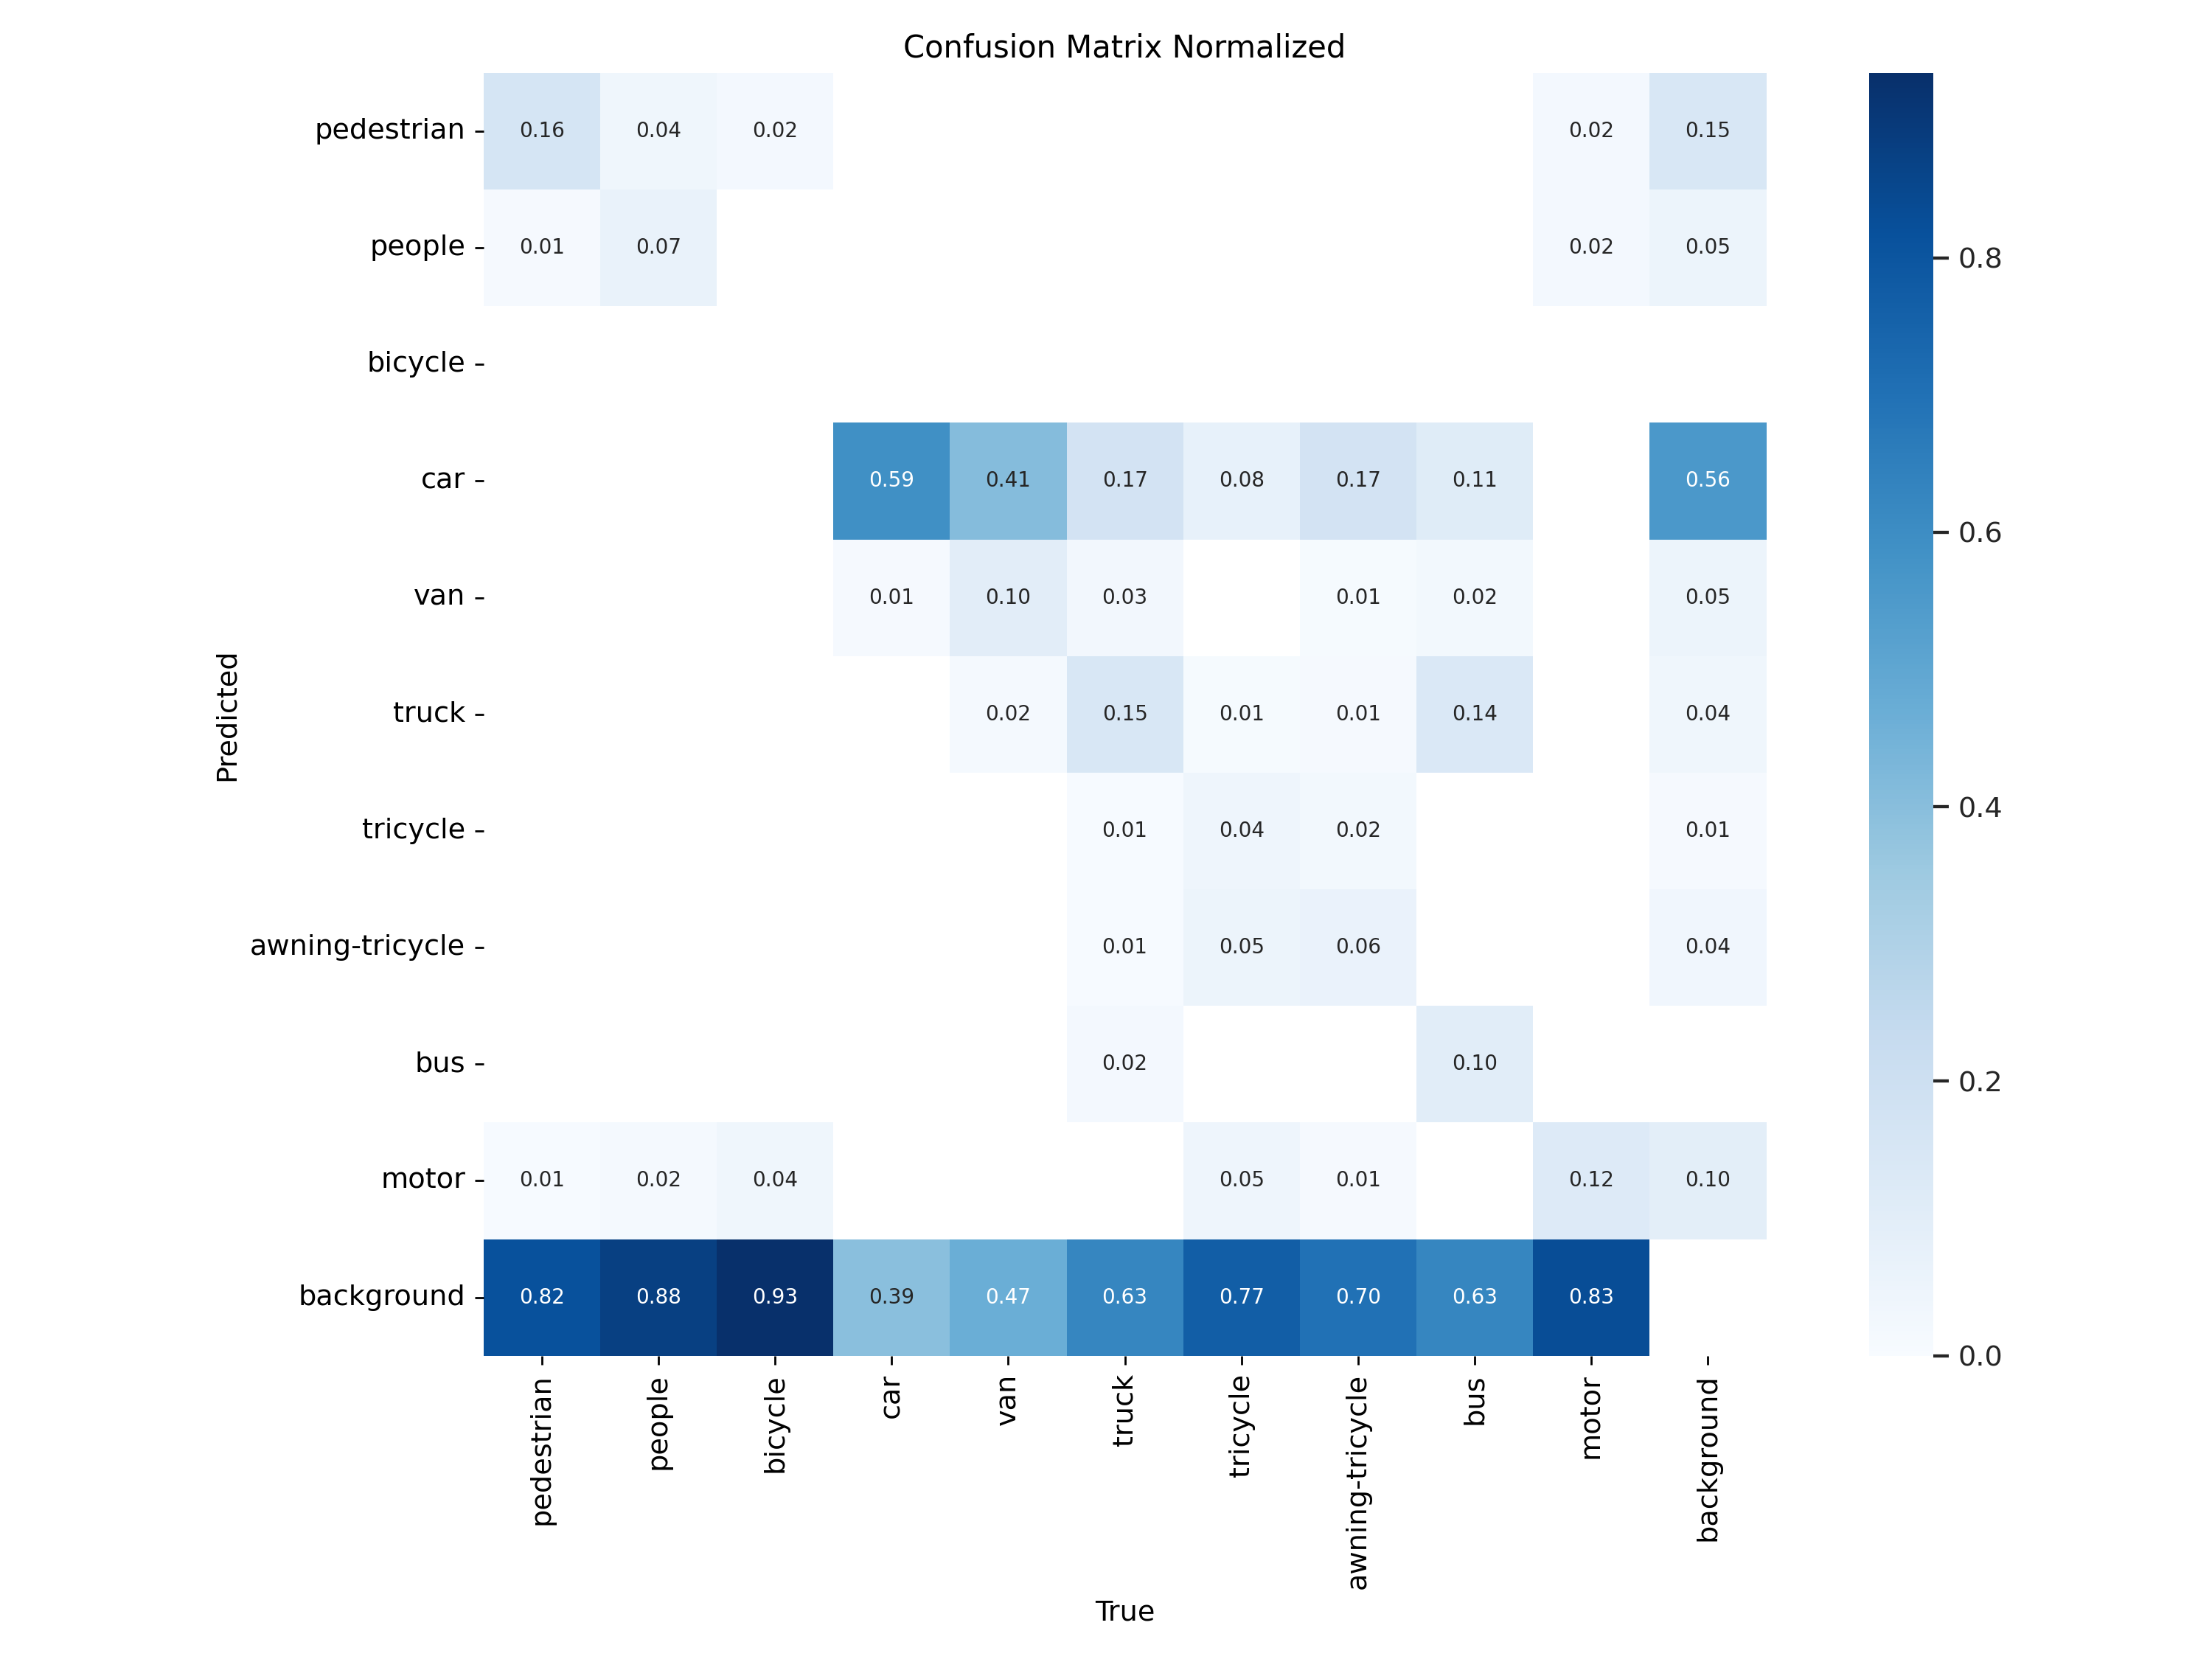

In [47]:
display(Image(filename=os.path.join(ROOT_DIR, 'runs', 'detect', 'train', 'confusion_matrix_normalized.png')))

The confusion matrix indicates that the model is not performing well in detecting objects in the images, probably because the smaller objects are not being detected. The performance is likely related to the nano architecture, limited training data, and a small number of epochs.

Now, let's load a random image from the training data, detect objects in it, and display the image along with the predictions.


0: 480x640 12 cars, 5 buss, 95.7ms
Speed: 5.0ms preprocess, 95.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


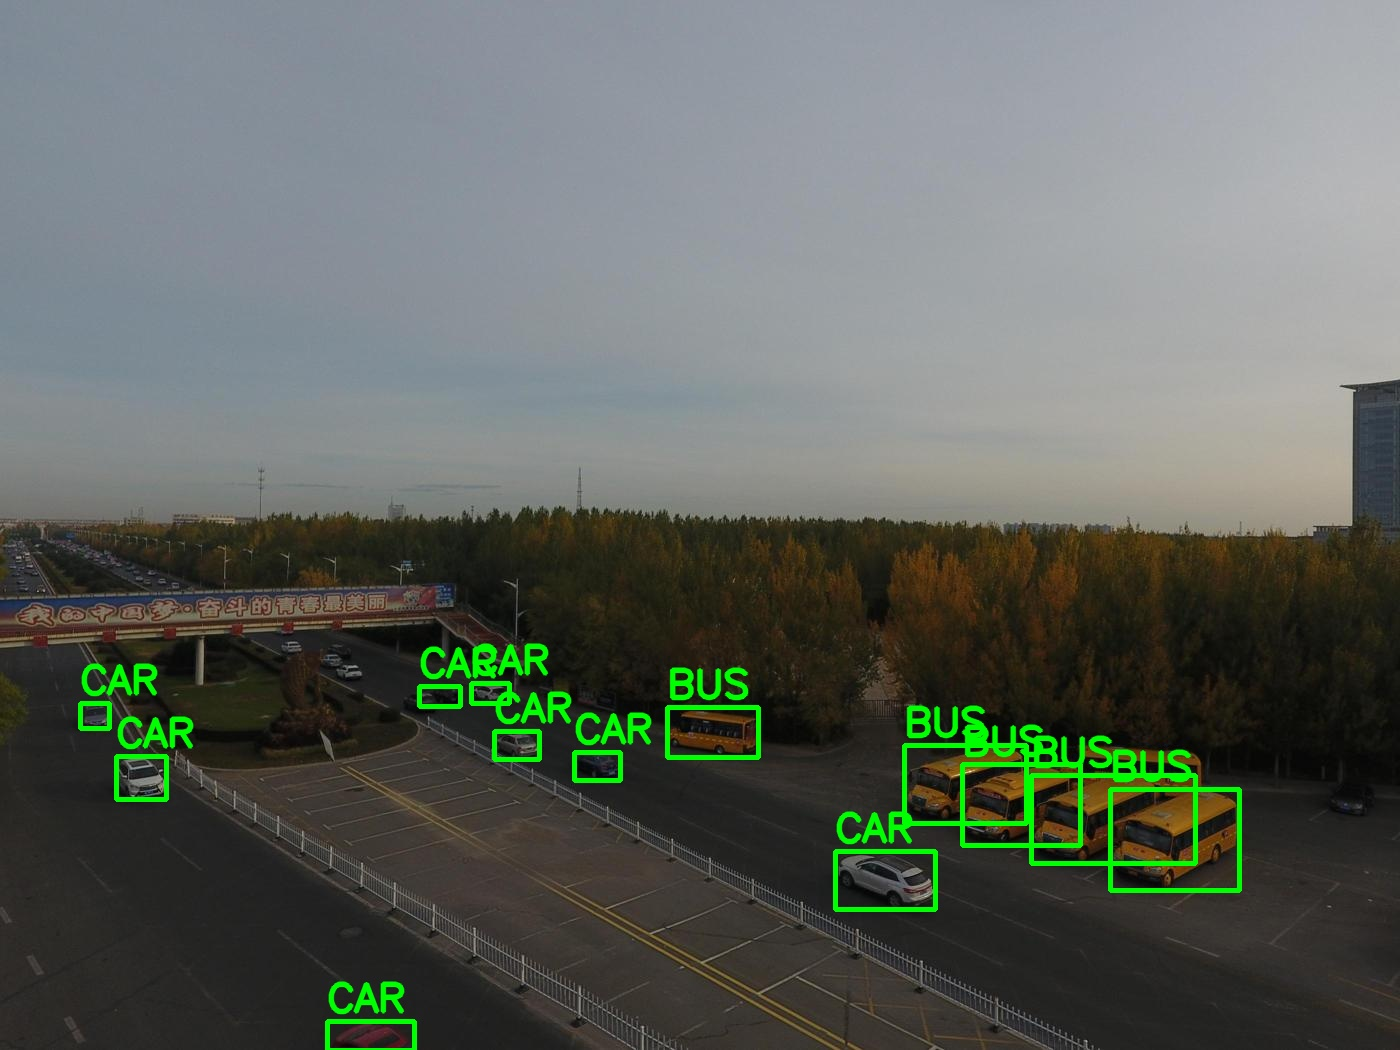

In [3]:
model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'best.pt')
_model = YOLO(model_path) 

img_path = os.path.join(DATASET_DIR, 'train', 'images', '9999996_00000_d_0000013.jpg')

img = cv2.imread(img_path)

threshold = 0.5
predicted_img = yolo_predict_img(_model, img, threshold)

output_path = os.path.join(ROOT_DIR, 'annotated_example.jpg')
cv2.imwrite(output_path, predicted_img)

display(Image(data=bytes(cv2.imencode('.jpg', predicted_img)[1]), format='jpg'))
os.remove(output_path)